In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

C:\Users\Gandhi\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
recruit = pd.read_csv(r"F:\Data Science\Menternships\6. Best Source of Recruitment\Data\Recruitment_Data.csv")
recruit

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,NaN
2,1,2,0.497530,Campus
3,0,2,2.513958,NaN
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,NaN
444,0,4,1.598213,Applied Online


In [3]:
recruit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           446 non-null    int64  
 1   performance_rating  446 non-null    int64  
 2   sales_quota_pct     446 non-null    float64
 3   recruiting_source   241 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 14.1+ KB


In [4]:
recruit.describe()

,attrition,performance_rating,sales_quota_pct
count,446.000000,446.000000,446.000000
mean,0.213004,2.894619,1.082607
std,0.409891,0.683755,0.710042
min,0.000000,1.000000,-0.710827
25%,0.000000,2.000000,0.584444
50%,0.000000,3.000000,1.070143
75%,0.000000,3.000000,1.532488
max,1.000000,5.000000,3.666740


In [5]:
recruit['recruiting_source'].value_counts()

recruiting_source
Applied Online    130
Campus             56
Referral           45
Search Firm        10
Name: count, dtype: int64

In [6]:
recruit.isna().sum()

attrition               0
performance_rating      0
sales_quota_pct         0
recruiting_source     205
dtype: int64

In [7]:
# since 205 out of 446 values are missing, we cannot ignore them as they constitute almost 46% of the data
# so I have decided to replace it with "Others" instead of imputing it with mode value

recruit['recruiting_source'] = recruit['recruiting_source'].fillna("Others")
recruit

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,1,3,1.088190,Applied Online
1,0,3,2.394173,Others
2,1,2,0.497530,Campus
3,0,2,2.513958,Others
4,0,3,1.424789,Applied Online
...,...,...,...,...
441,0,3,1.627813,Campus
442,1,4,0.689682,Referral
443,0,4,1.196198,Others
444,0,4,1.598213,Applied Online


<Axes: xlabel='recruiting_source', ylabel='Count'>

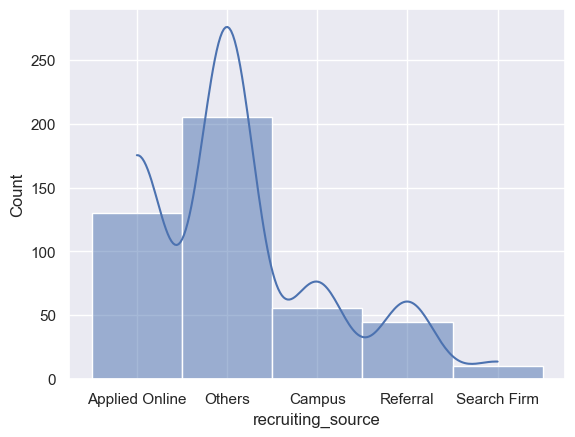

In [8]:
sns.histplot(recruit['recruiting_source'], kde=True)

In [9]:
recruit.groupby('recruiting_source').size().reset_index()

,recruiting_source,0
0,Applied Online,130
1,Campus,56
2,Others,205
3,Referral,45
4,Search Firm,10


In [10]:
# Attrition details by Recruiting Source
attrition = recruit.groupby('recruiting_source')['attrition'].value_counts().unstack()
attrition

attrition,0,1
recruiting_source,,
Applied Online,98,32
Campus,40,16
Others,178,27
Referral,30,15
Search Firm,5,5


In [11]:
recruit.groupby('recruiting_source')['performance_rating'].mean().reset_index()

,recruiting_source,performance_rating
0,Applied Online,2.930769
1,Campus,2.928571
2,Others,2.882927
3,Referral,2.844444
4,Search Firm,2.700000


In [12]:
# Average Attrition based on Recruiting Source
attr2 = recruit.groupby('recruiting_source')['attrition'].mean().reset_index().sort_values(by='attrition')
attr2

,recruiting_source,attrition
2,Others,0.131707
0,Applied Online,0.246154
1,Campus,0.285714
3,Referral,0.333333
4,Search Firm,0.500000


In [13]:
# Average Sales details by Recruiting Source
avg_sales = recruit.groupby('recruiting_source')['sales_quota_pct'].mean().reset_index().sort_values(by='sales_quota_pct', ascending=False)
avg_sales

,recruiting_source,sales_quota_pct
2,Others,1.168109
0,Applied Online,1.058590
3,Referral,1.023198
1,Campus,0.908035
4,Search Firm,0.886960


1. The attrition rate is the lowest in the recruitng_source "Others", followed by "Applied Online" and "Campus"
2. The average sales is also the highest in "Others", then in "Applied online", "Referral"
3. In both the cases "Others" and "Applied Online" sources gave higher results
4. The "Search Firm" source has 50% attrition rate and sales is also the lowest among the given sources

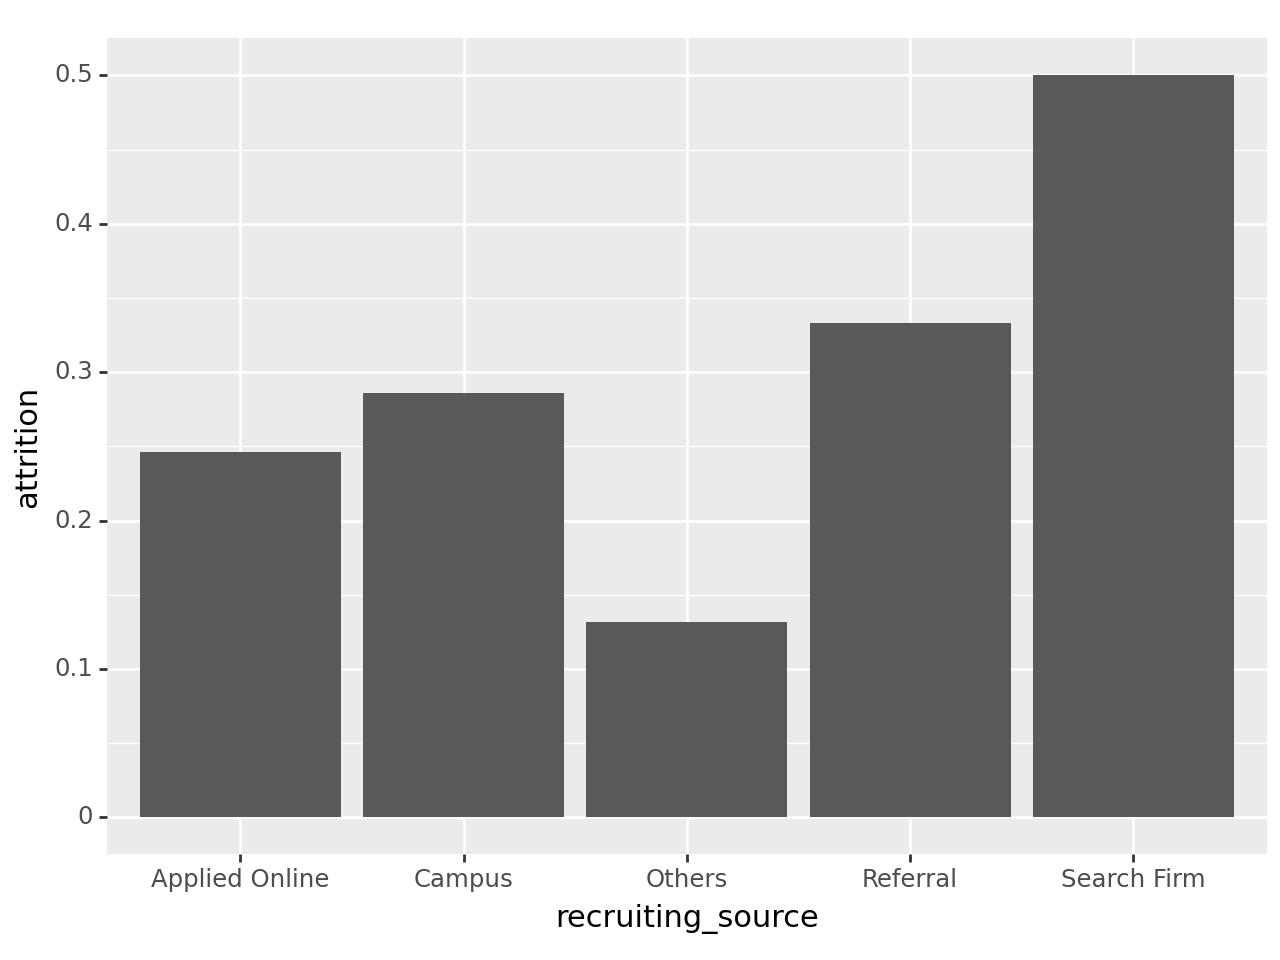

<Figure Size: (640 x 480)>

In [31]:
# pip install plotnine
# Visualize Attrition differences by Recruiting Source

ggplot(attr2) + aes(x='recruiting_source', y='attrition') + geom_col()

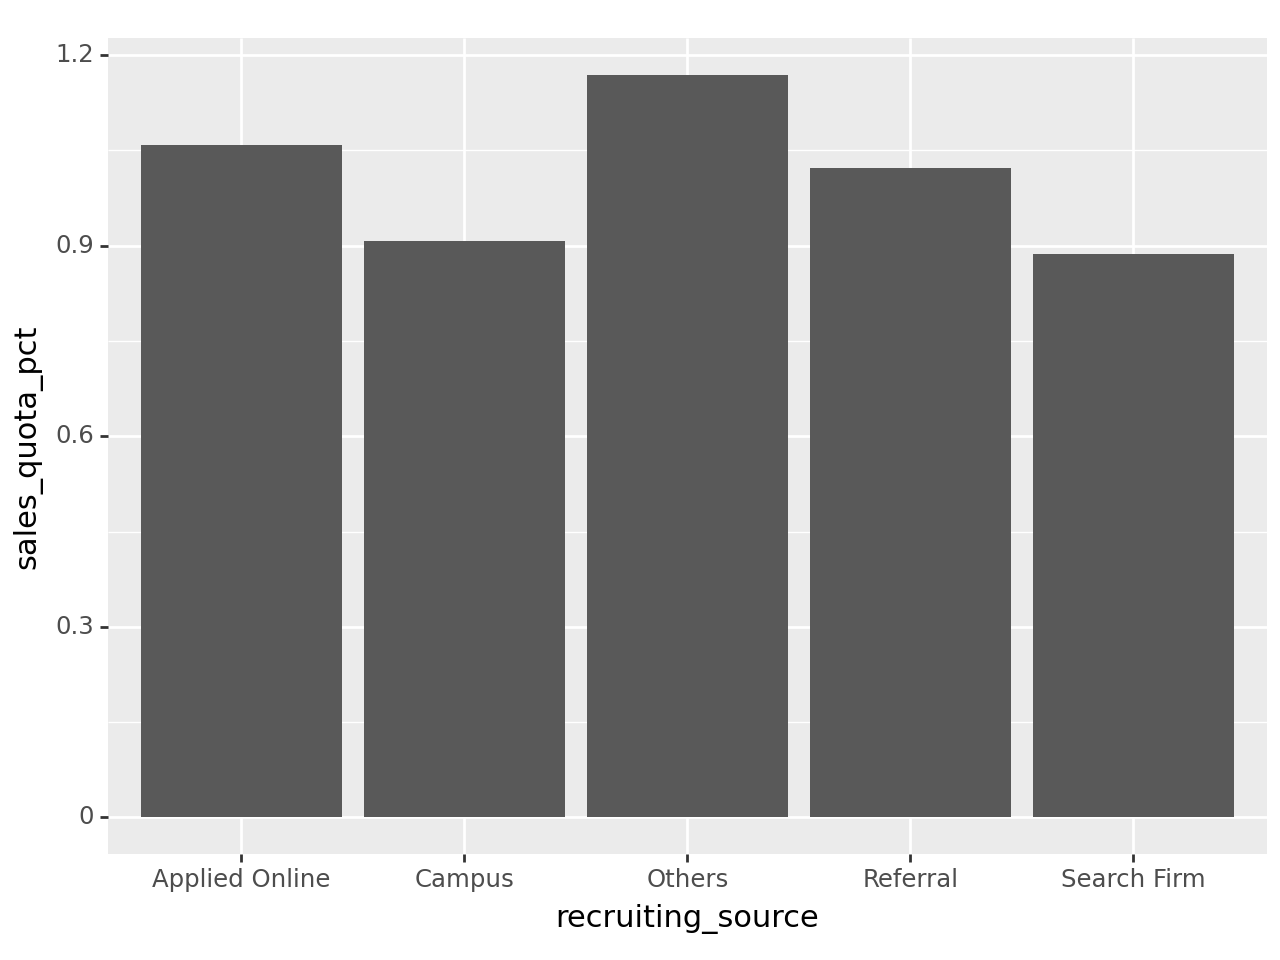

<Figure Size: (640 x 480)>

In [32]:
# Visualize Sales differences by Recruiting Source

ggplot(avg_sales) + aes(x='recruiting_source', y='sales_quota_pct') + geom_col()

1. So, as per the charts and the data available, the best source of recruitment can be "Others" and then "Applied Online" because the attrition rates are the low and sales pct is high from these sources as compared to other sources.
2. "Campus" and "Referral" sources may also be considered after them.
3. While the "Search Firm" source gives low sales and high attrition, so it is recommended to avoid it.